In [1]:
# Import necessary python libraries and constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

In [2]:
a0 = 1 # Bohr radius, 1 atmoic unit

# Define Hydrogen 2p orbital according to the given equation.
def psi_2p_z(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) # Compute the radial distance
    cos_theta = z / r # Compute the polar angle.
    psi_2p_z = (1 / (4 * np.sqrt(2 * pi) * a0** (3 / 2 ))) * (r / a0) * cos_theta * np.exp(-r / (2 * a0))
    return psi_2p_z

In [3]:
# Random sampling
def random_sampling(R, N, L):
    np.random.seed(42) # Set a random seed for reproducibility.
    x = np.random.uniform(-L, L, N) # Generate N random points in the range of [-L, L]
    y = np.random.uniform(-L, L, N)
    z = np.random.uniform(-L, L, N)
    integrand = psi_2p_z(x, y, z + R / 2) * psi_2p_z(x, y, z - R / 2) # Compute the integrand
    V = (2 * L)**3
    S_R = V * np.mean(integrand) # Compute the overlap integral
    return S_R

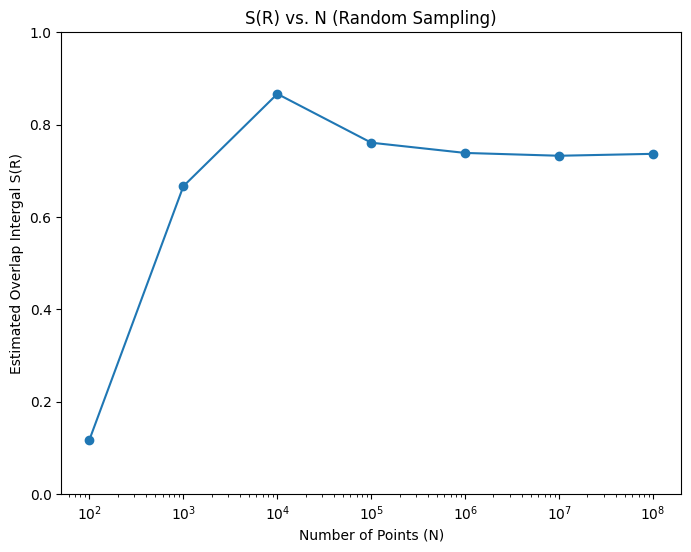

In [4]:
# Set the values of R and L
R = 2
L = 20

# Compute overlap integral for differnet numbers of points
point_numbers = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
S_R_values = [random_sampling(R, N, L) for N in point_numbers]

# Plot S(R) vs N 
plt.figure(figsize=(8, 6))
plt.plot(point_numbers, S_R_values, marker = 'o')
plt.xscale('log') # Logarithmic scale
plt.ylim(0, 1)
plt.xlabel('Number of Points (N)')
plt.ylabel('Estimated Overlap Intergal S(R)')
plt.title('S(R) vs. N (Random Sampling)')
plt.savefig('S(R) vs N (Random Sampling).png')
plt.show()

In [5]:
# Discuss the convergence
print('Discussion: the result for S(R) converges when N is greater than 10^6 ')

Discussion: the result for S(R) converges when N is greater than 10^6 


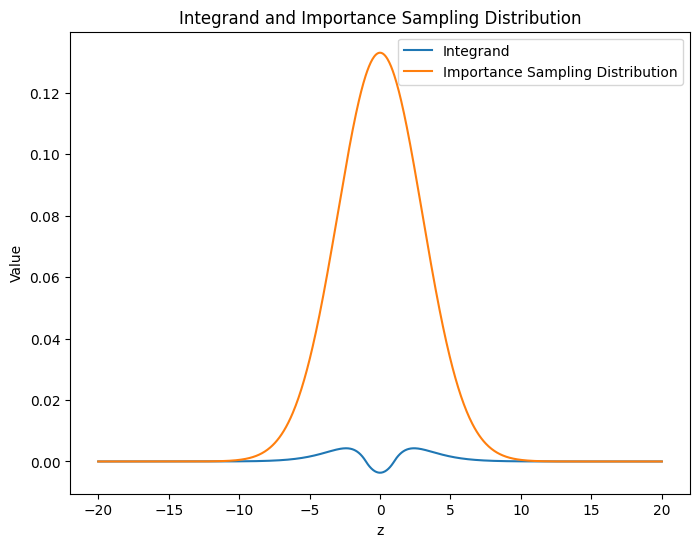

In [6]:
from scipy.stats import norm # Use Gaussian distribution as the importance sampling distribution, I didn't use the exponential distribution as we did in Lecture 13, because it is not symmetric about 0.

# Plot the integrand and the importance sampling distribution
x = 0
y = 0
z = np.linspace(-20, 20, 1000)

integrand = psi_2p_z(x, y, z + 1) * psi_2p_z(x, y, z - 1) # Compute the integrand 
importance_sampling = norm.pdf(z, loc = 0, scale = 3) # Set Gaussian distribution's mean = 0, standard deviation = 3

# Gaussian distribution is symmetric about 0 and takes most sample points around 0, so it is suitable to be used as the importance sampling distribution.
plt.figure(figsize=(8, 6))
plt.plot(z, integrand, label='Integrand')
plt.plot(z, importance_sampling, label='Importance Sampling Distribution')
plt.xlabel('z')
plt.ylabel('Value')
plt.title('Integrand and Importance Sampling Distribution')
plt.legend()
plt.show()

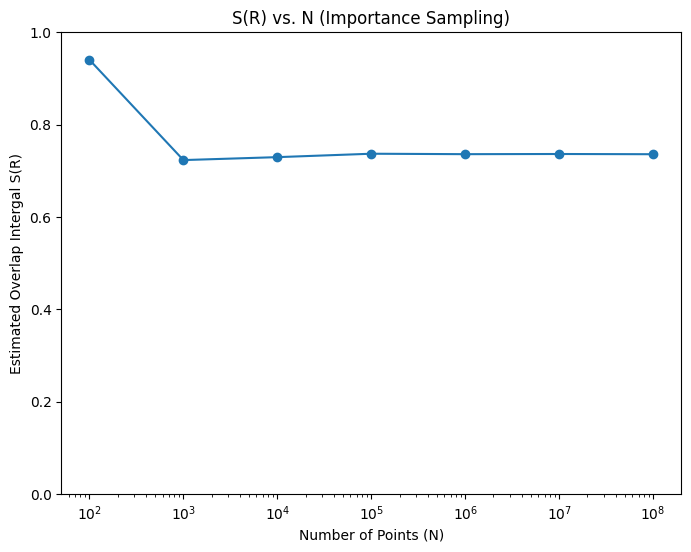

In [7]:
# Importance sampling
def importance_sampling(R, N):
    # Generate N numbers of points in a Gaussian distribution.
    np.random.seed(42)
    x = norm.rvs(loc = 0, scale = 3, size = N)
    y = norm.rvs(loc = 0, scale = 3, size = N)
    z = norm.rvs(loc = 0, scale = 3, size = N)
    
    g_values = norm.pdf(x, loc = 0, scale = 3) * norm.pdf(y, loc = 0, scale = 3) * norm.pdf(z, loc = 0, scale = 3)  # g(x,y,z )
    integrand = (psi_2p_z(x, y, z + R/2) * psi_2p_z(x, y, z - R/2)) # Adjust the integrand by dividing g(x,y,z)

    # Compute the overlap integral
    S_R = np.mean(integrand / g_values)
    return S_R

R = 2 # Set the value of R

# Compute overlap integral for differnet numbers of points by using importance sampling
point_numbers = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
S_R_values = [importance_sampling(R, N) for N in point_numbers]

# Plot S(R) vs N 
plt.figure(figsize=(8, 6))
plt.plot(point_numbers, S_R_values, marker = 'o')
plt.xscale('log')
plt.ylim(0, 1)
plt.xlabel('Number of Points (N)')
plt.ylabel('Estimated Overlap Intergal S(R)')
plt.title('S(R) vs. N (Importance Sampling)')
plt.savefig('S(R) vs N (Importance Sampling).png')
plt.show()

In [8]:
# Discuss the efficiency and convergence by using importance sampling.
print('Discussion: By using importance sampling, the result for S(R) converges when N is greater than 10^5, which is  one order of magnitude smaller than random sampling.')

Discussion: By using importance sampling, the result for S(R) converges when N is greater than 10^5, which is  one order of magnitude smaller than random sampling.


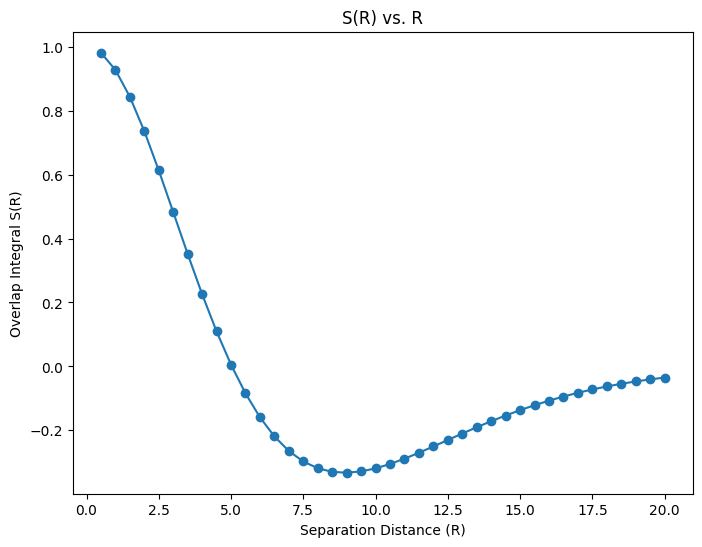

In [9]:
# Plot the overlap integral as a function of separation distance
R_values = np.arange(0.5, 20.1, 0.5) # R = 20*a0 will not be included if the code is written as "np.arange(0.5, 20, 0.5)"
N = 10**6 # Set the number of points as 10^6
S_R_values = [importance_sampling(R, N) for R in R_values]

# Plot S(R) vs. R
plt.figure(figsize=(8, 6))
plt.plot(R_values, S_R_values, marker='o')
plt.xlabel('Separation Distance (R)')
plt.ylabel('Overlap Integral S(R)')
plt.title('S(R) vs. R')
plt.savefig('S(R) vs R.png')
plt.show()


In [10]:
# Why importance sampling improves efficiency
print('The reason why importance sampling improves efficiency: Importance sampling enhances efficiency in Monte Carlo integration by directing the sampling towards significant contributions, thereby reducing variance and computational cost. In this case, points around "0" make the most significant contributions to overlap integral, by using a Gaussian distribution, which is symmetric about 0, we can sample these points effectively')

The reason why importance sampling improves efficiency: Importance sampling enhances efficiency in Monte Carlo integration by directing the sampling towards significant contributions, thereby reducing variance and computational cost. In this case, points around "0" make the most significant contributions to overlap integral, by using a Gaussian distribution, which is symmetric about 0, we can sample these points effectively


In [11]:
# Comment on the physical significance of the overlap integral and its dependence on R
print('As the distance R between the two orbitals increases, the overlap S(R) generally decreases, reflecting the reduced interaction between the orbitals. But as R increases to a certain point, the overlap can become negative, indicating that the orbitals are becoming more out of phase and thus leading to antibonding interactions.')

As the distance R between the two orbitals increases, the overlap S(R) generally decreases, reflecting the reduced interaction between the orbitals. But as R increases to a certain point, the overlap can become negative, indicating that the orbitals are becoming more out of phase and thus leading to antibonding interactions.
